# Technical Report

### By: Joseph Torii and Alex Giacobbi
Professor: Sprint
Class: CPSC 322
Date: 05/05/2021


# Introduction

When we started this project, we had the idea that we were going to use the Netflix TV Shows and Movies dataset. Although, after trying multiple classifications, we soon realized that there were not many possibilities of classifications. So, we ended up switching to the Stars dataset. The stars dataset consists of seven different attributes to determine a star. Some of these attributes include luminosity, magnitude, and temperature. 

The classification task we implemented was to use attributes such as temperature, luminosity, radius, and color to determine the type of star it is. The star could be one of six different types. These types are: Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, and Hyper Giants. 

After doing tests on the Naive Bayes, Normal Decision Tree, and Random Forest Classifiers, we found that the Normal Decision Tree Classifier gave us the best accuracy at an impressive 100 percent! At first we thought it was a fluke but after thorough testing and multiple strategies, we concluded that the Normal Decision Tree performed the best.

In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyZeroRClassifier, MyRandomClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

from tabulate import tabulate

# Exploratory Data Analysis

Our dataset consisted of 7 different attributes that were all used to determine what type the star was. The 7 attributes are: temperature, luminosity, radius, magnitude, color, spectral class, and type. Below are short descriptions on each of the attributes:

temperature(int): heat of the star 
luminosity(float): the amount of energy the star produces
radius(float): the distance from the outer portion to the center of the star
magnitude(float): the amount of light the star produces
color(string): color of the star
spectral_class(char): where the star's color lands on the color spectrum
type(string): scientific classification of the star

Below is where we went into further detail and perform basic data distributions on our dataset.

### Figure 1

Shows the frequencies of the stars after they have been labeled either "red" or "blue".

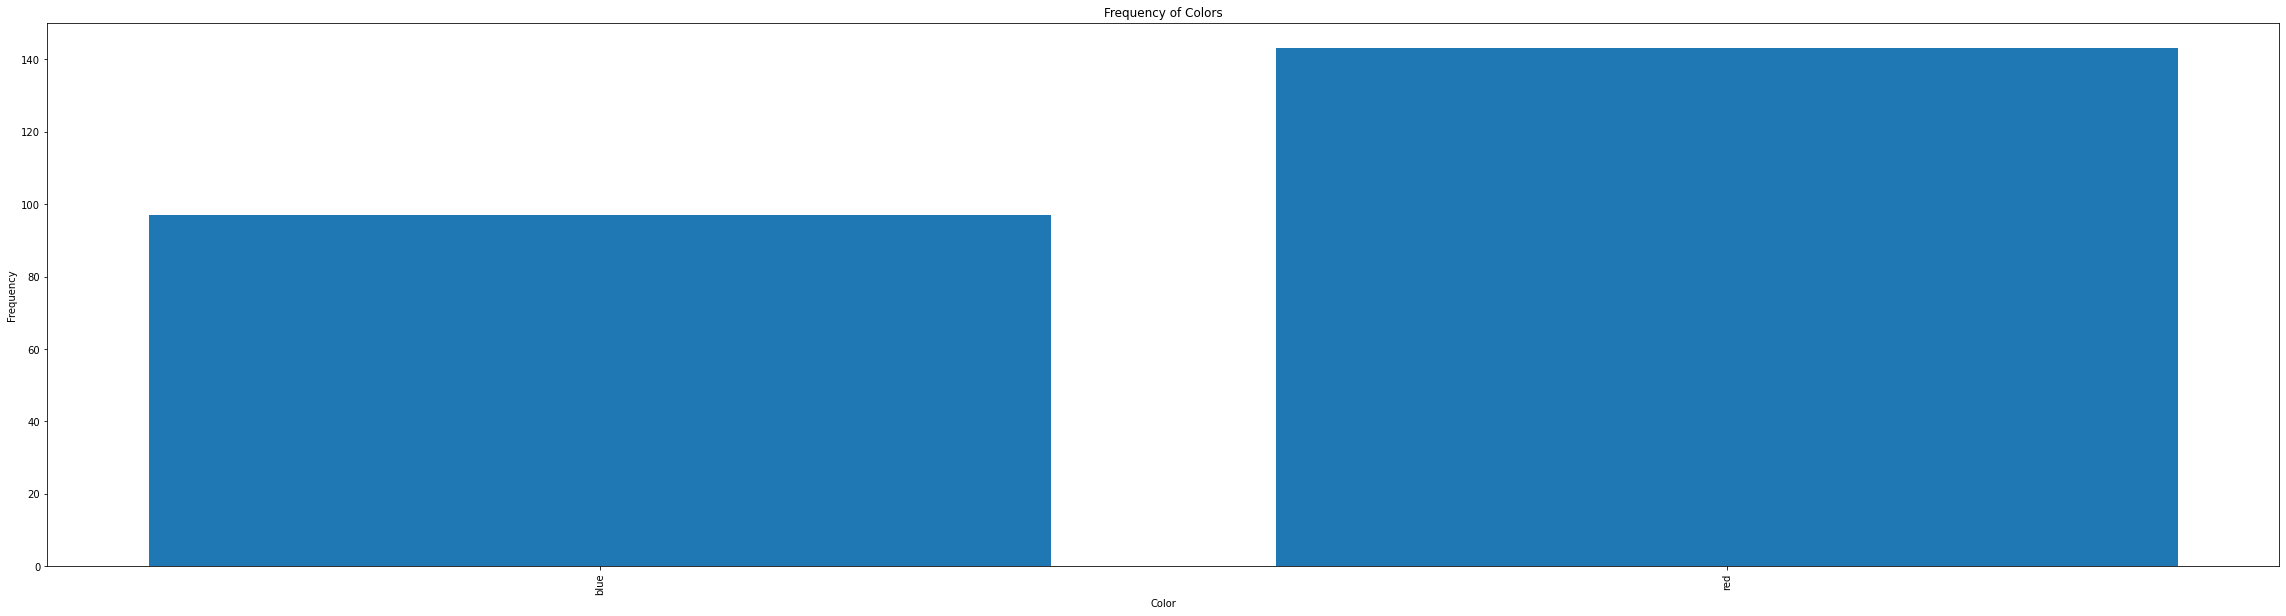

In [2]:
stars_table = myutils.load_data("Stars.csv")
colors = stars_table.get_column("Color")
colors = myutils.categorize_colors(colors)
colors_freq = myutils.count_frequency(colors)
myutils.frequency_diagram(colors_freq, "Frequency of Colors", "Color", "Frequency")


### Figure 2

Shows the tempature of all the stars as "high", "medium-high", "medium", "medium-low", and "low". Since the tempature of a star can be anywhere from 0 - 40,000.

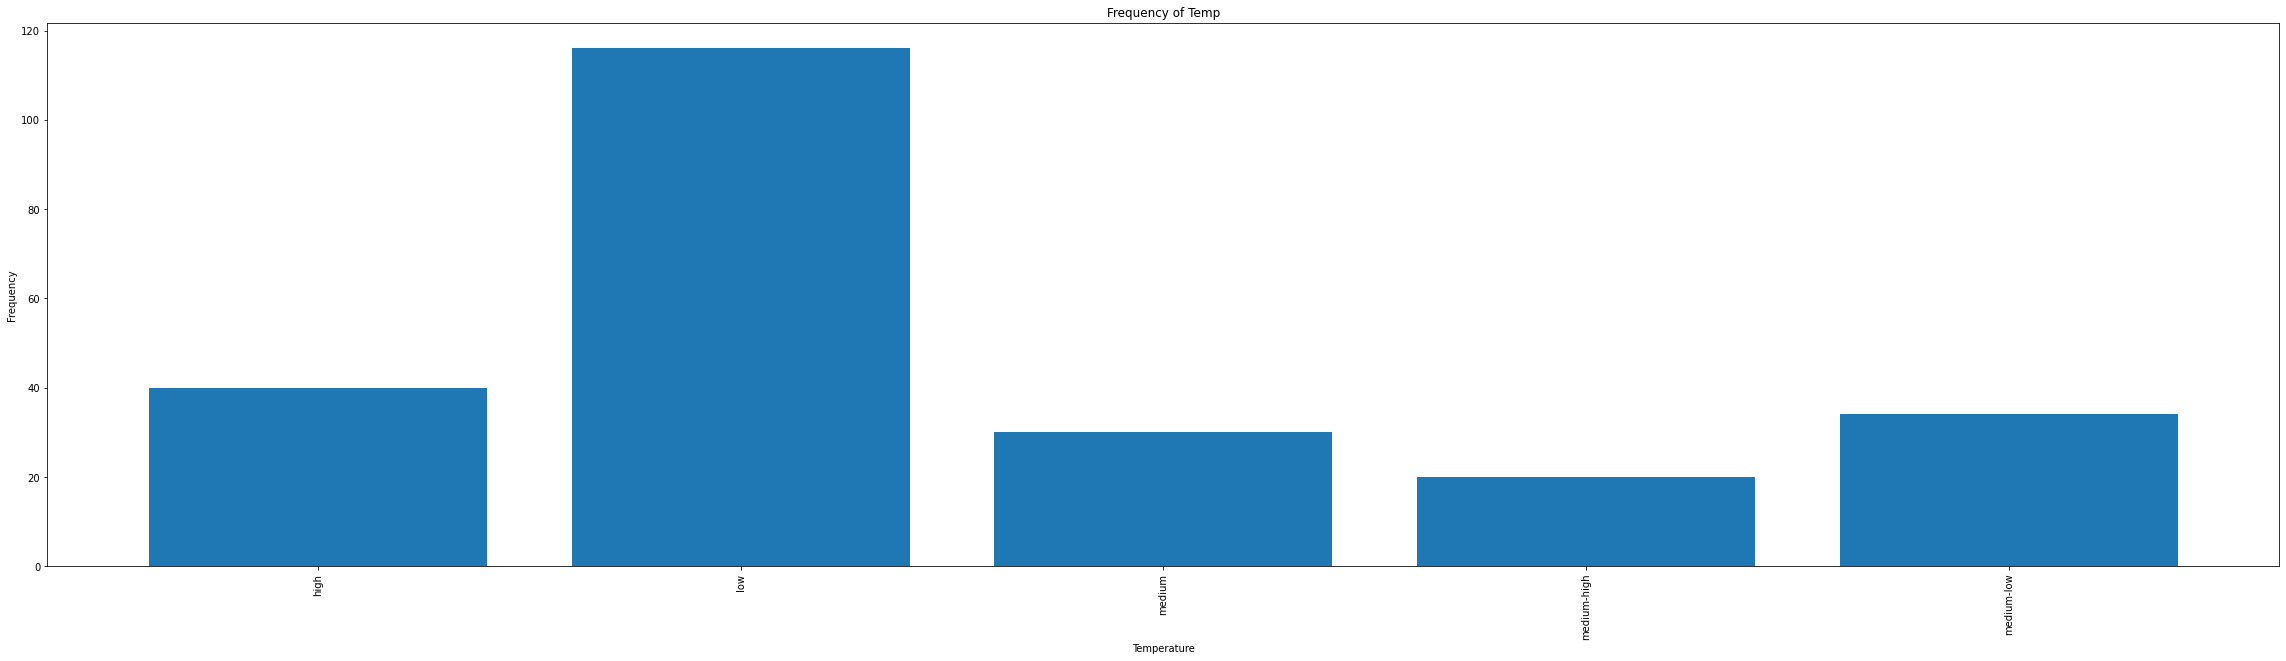

In [3]:
temp = stars_table.get_column("Temperature")
temp = myutils.temp_bins(temp)
temp_freq = myutils.count_frequency(temp)
myutils.frequency_diagram(temp_freq, "Frequency of Temp", "Temperature", "Frequency")

### Figure 3

Since the range of luminosity of each star can range from 0 - 850000, we decided to make bins. 
Shows the frequency of the luminosity of stars in ranges.

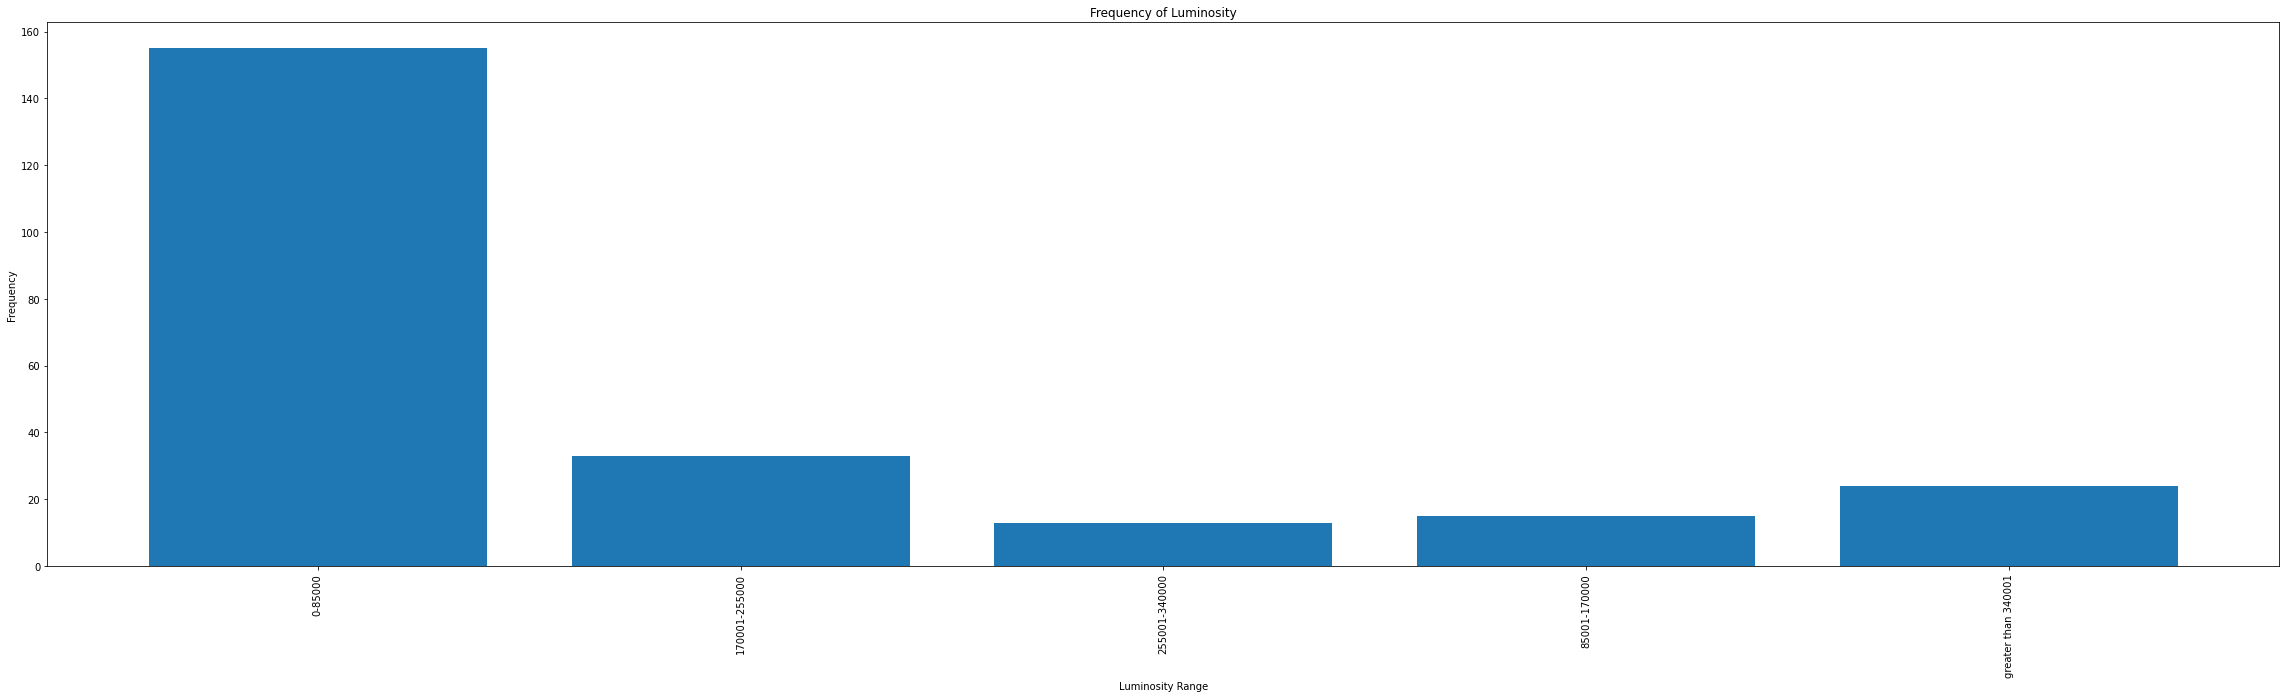

In [4]:
lum = stars_table.get_column("L")
lum = myutils.luminosity_bins(lum)
lum_freq = myutils.count_frequency(lum)
myutils.frequency_diagram(lum_freq, "Frequency of Luminosity", "Luminosity Range", "Frequency")

### Figure 4

There are very big differences in radius size between the stars in our dataset. So, we decided to divide them into the two major ranges of 0 - 100 and greater than 200. 

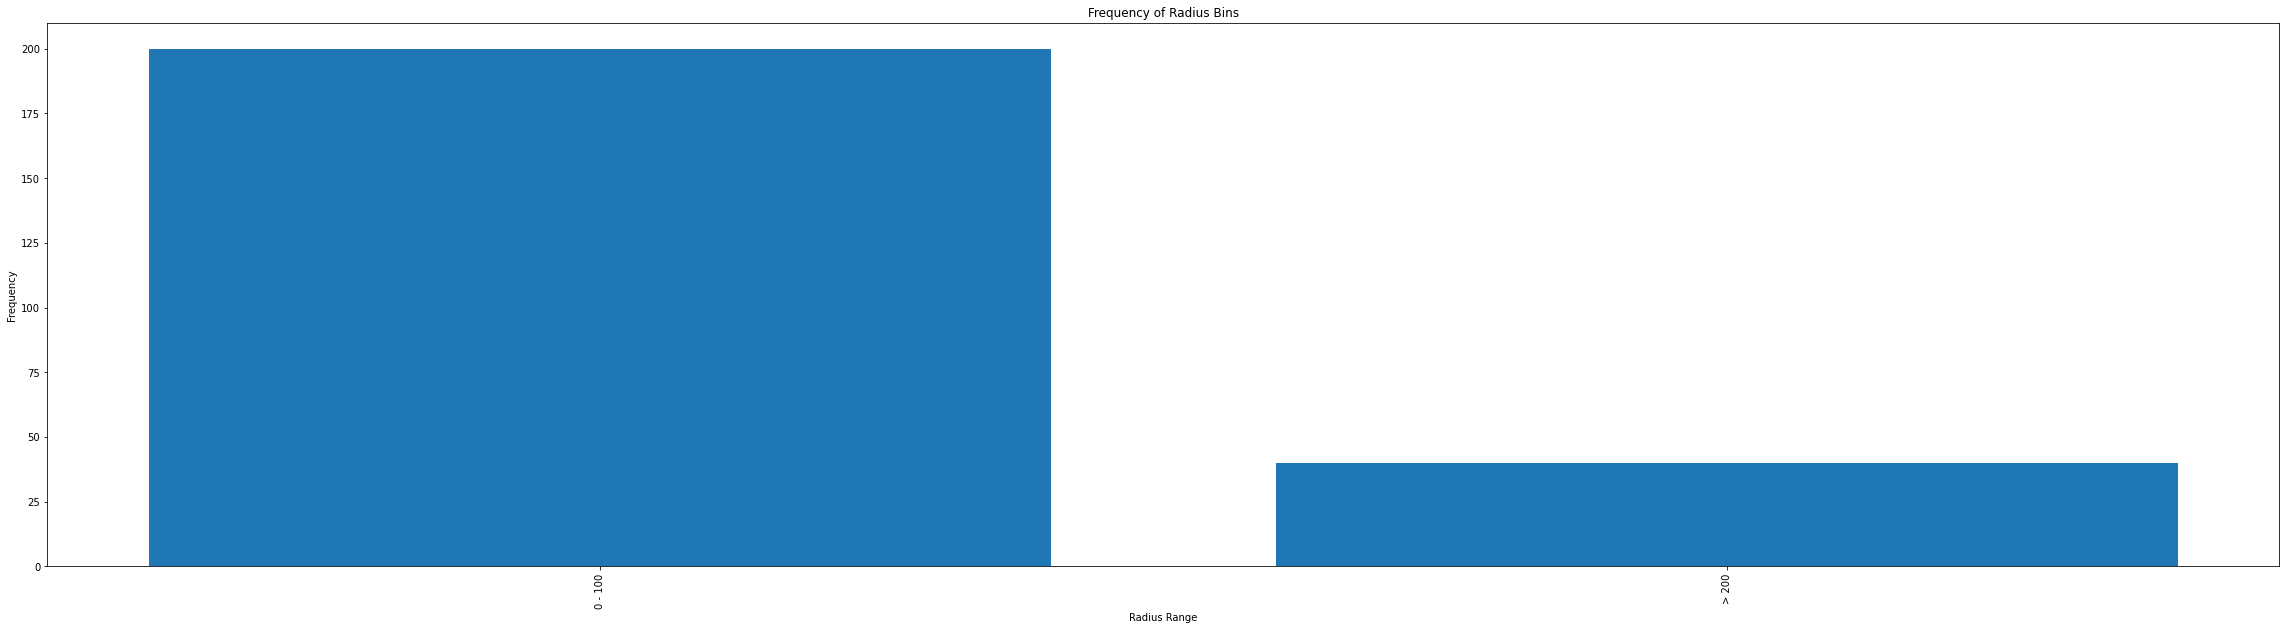

In [5]:
radius = stars_table.get_column("R")
radius = myutils.get_radius(radius)
radius_freq = myutils.count_frequency(radius)
myutils.frequency_diagram(radius_freq, "Frequency of Radius Bins", "Radius Range", "Frequency")

### Figure 5

The magnitude of the different stars can range anywhere from -11 to 20. So instead, we arranged the magnitudes into 5 different bins.


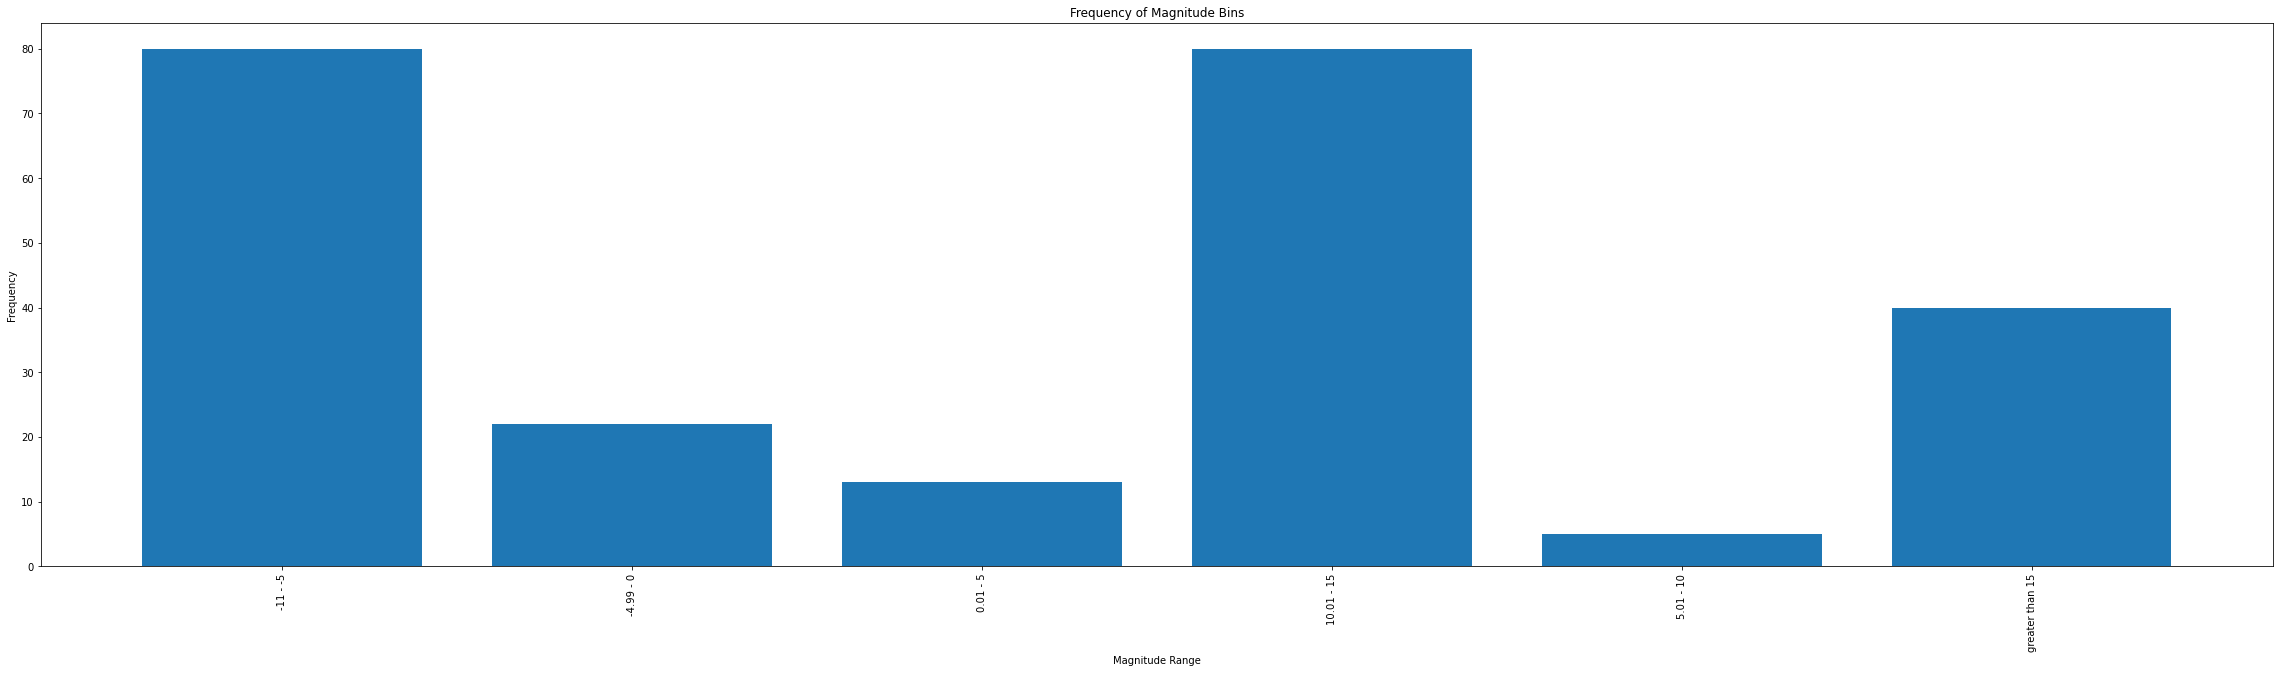

In [6]:
mag = stars_table.get_column("A_M")
mag = myutils.get_magnitude(mag)
mag_freq = myutils.count_frequency(mag)
myutils.frequency_diagram(mag_freq, "Frequency of Magnitude Bins", "Magnitude Range", "Frequency")

### Figure 6

The spectral class is where the star's color ends up on the color spectrum along with the temperature of the star's surface. The majority of the stars end up in either categories "B" or "M". Below has the main 2 categories, M and B, along with an other category to hold the other stars' spectral classes.

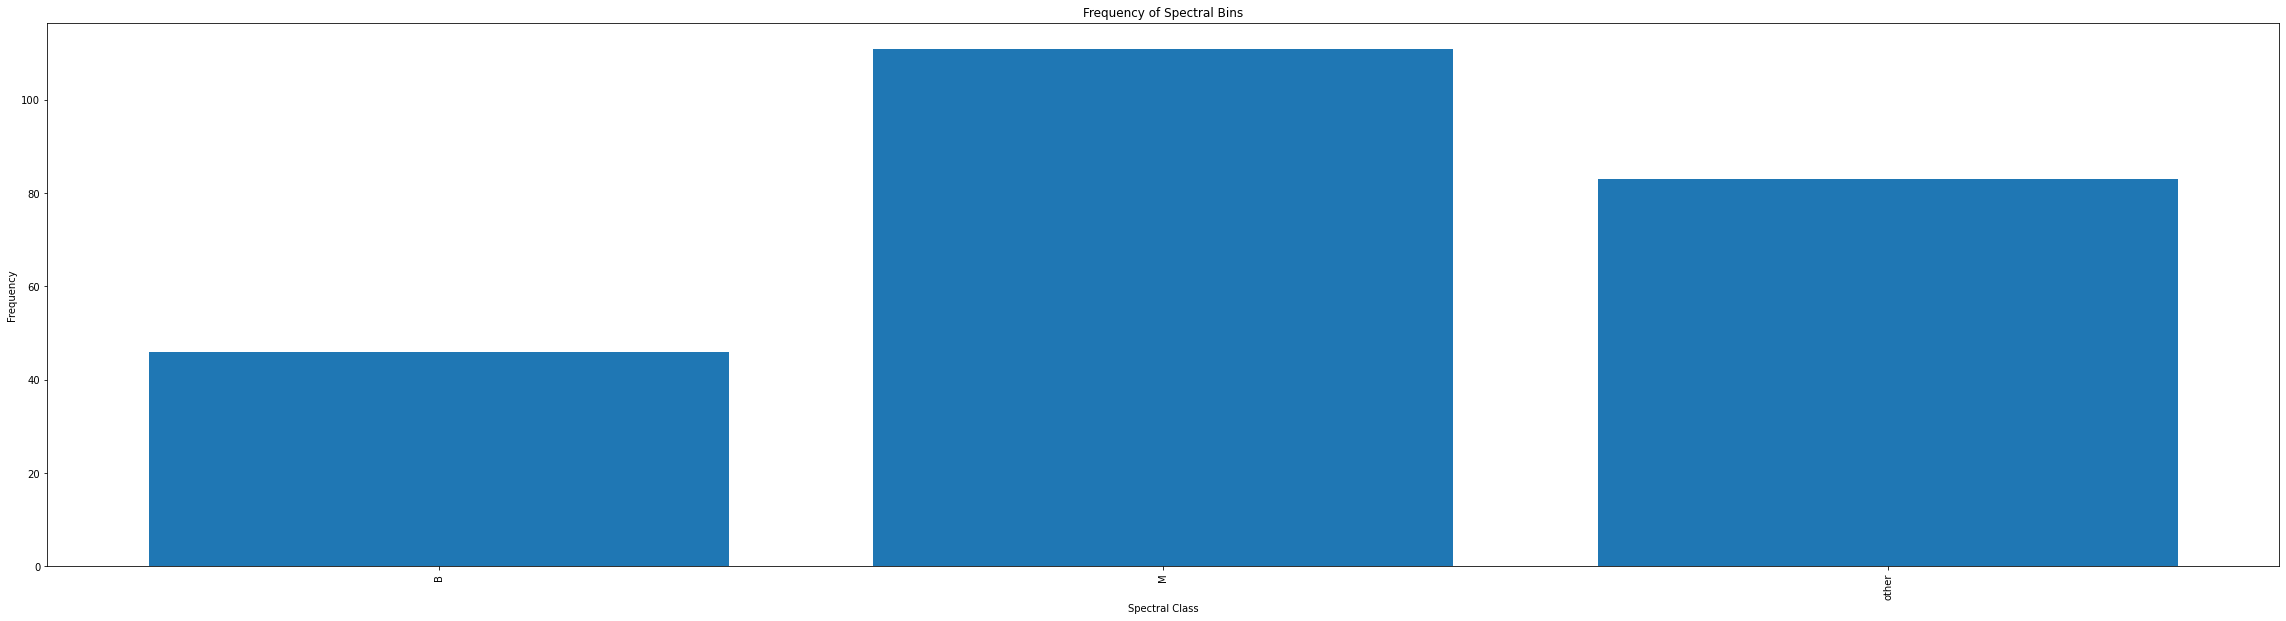

In [7]:
spectral = stars_table.get_column("Spectral_Class")
spectral = myutils.get_spectral_class(spectral)
spectral_freq = myutils.count_frequency(spectral)
myutils.frequency_diagram(spectral_freq, "Frequency of Spectral Bins", "Spectral Class", "Frequency")

## Preliminary Classification

### Below is the Naive Bayes Classifier Comparison

In [8]:
temperature = stars_table.get_column('Temperature')
temperature = myutils.temp_bins(temperature)
L = stars_table.get_column('L')
L = myutils.luminosity_bins(L)
R = stars_table.get_column('R')
R = myutils.get_radius(R)
a_m = stars_table.get_column('A_M')
a_m = myutils.get_magnitude(a_m)
color = stars_table.get_column('Color')
color = myutils.categorize_colors(color)
spectral_class = stars_table.get_column('Spectral_Class')
spectral_class = myutils.get_spectral_class(spectral_class)

type = stars_table.get_column('Type')

x_vals = [[temperature[i], str(L[i]), str(R[i]), str(a_m[i]), color[i], spectral_class[i]] for i in range(len(stars_table.data))]
y_vals = type

xtr, xts, ytr, yts = myevaluation.train_test_split(x_vals, y_vals)

myNb = MyNaiveBayesClassifier()
myNb.fit(xtr, ytr)

predicted = myNb.predict(xts)

accuracy = myutils.compute_accuracy(predicted, yts)
print('Naive Bayes: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

Naive Bayes: Accuracy = 100.0 Error Rate =  0.0


### Below is the Normal Decision Tree Classifier

In [9]:
temperature = stars_table.get_column('Temperature')
temperature = myutils.temp_bins(temperature)
L = stars_table.get_column('L')
L = myutils.luminosity_bins(L)
R = stars_table.get_column('R')
R = myutils.get_radius(R)
a_m = stars_table.get_column('A_M')
a_m = myutils.get_magnitude(a_m)
color = stars_table.get_column('Color')
color = myutils.categorize_colors(color)
spectral_class = stars_table.get_column('Spectral_Class')
spectral_class = myutils.get_spectral_class(spectral_class)
type = stars_table.get_column('Type')

x_vals = [[temperature[i], str(L[i]), str(R[i]), str(a_m[i]), color[i], spectral_class[i]] for i in range(len(stars_table.data))]
y_vals = type

xtr, xts, ytr, yts = myevaluation.train_test_split(x_vals, y_vals)

my_tree = MyDecisionTreeClassifier()
my_tree.fit(xtr, ytr)

predicted2 = my_tree.predict(xts)
accuracy2 = myutils.compute_accuracy(predicted2, yts)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 100.0 Error Rate =  0.0


### Below is the Random Forest Classifier

In [11]:
temperature = stars_table.get_column('Temperature')
temperature = myutils.temp_bins(temperature)
L = stars_table.get_column('L')
L = myutils.luminosity_bins(L)
R = stars_table.get_column('R')
R = myutils.get_radius(R)
a_m = stars_table.get_column('A_M')
a_m = myutils.get_magnitude(a_m)
color = stars_table.get_column('Color')
color = myutils.categorize_colors(color)
spectral_class = stars_table.get_column('Spectral_Class')
spectral_class = myutils.get_spectral_class(spectral_class)
type = stars_table.get_column('Type')

x_vals = [[temperature[i], str(L[i]), str(R[i]), str(a_m[i]), color[i], spectral_class[i]] for i in range(len(stars_table.data))]
y_vals = type

xtr, xts, ytr, yts = myevaluation.train_test_split(x_vals, y_vals)

rand_forest = MyRandomForestClassifier(3, 7, 2, None)
rand_forest.fit(xtr, ytr)
predicted2 = rand_forest.predict(xts)
accuracy2 = myutils.compute_accuracy(yts, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

samples: 160 160
13 13
samples: 160 160
12 12
samples: 160 160
13 13
My Decision Tree: Accuracy = 0.0 Error Rate =  100.0


# Classification Results

This section should describe the classification approach you developed and its performance. Explain what techniques you used, briefly how you designed and implemented the classifiers, how you evaluated your classifiers’ predictive ability, and how well the classifiers performed. Thoroughly describe how you evaluated performance, the comparison results, and which classifier is “best”. Include a link to a Heroku web app with this “best” classifier deployed with an API interface.


# Conclusion

After working with the Stars dataset and working with the classifications, we both enjoyed mining the data and running tests on this dataset. The only challenge that we had faced with this dataset was the fact that all the attributes tied very closely together that it was tough to find a classification that was not already given. So instead, we decided to "dull the data down". By this we mean that we sepearted the data into bins, almost every category had bins. That way, we could generalize the types of Stars that there were with more vague data, instead of specific, decimal data. 

All of our classifiers performed very well. Each with an accuracy of over 95 percent! There is not much improvement that we could have made there. But if we had more time, we would have tried to almost get accuracies that were lower, just to test out our creativity. 

